<a href="https://colab.research.google.com/github/soumendra/cnn-visualisation/blob/jawad/notebooks/getting_started_with_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started with Deep Learning (using Keras)

## MNIST

### 1. Importing dependencies and setting seeds

 **Importance of Seed**  
 Neural Network algorithms make heavy use of randomness, be it for initialization of layer weights or to decide which neurons to dropout.  
 As a result of this randomness, each training run of a neural network, is bound to produce slightly different results.  
 This can be a nuisance while experimenting. In order to ensure that our experiments are reproducible (getting the same output every time), by us or anyone else who chooses to run them, we need to seed this randomness.  

---
**Why are we setting two different seeds?**  
Keras relies on `numpy` for some of it's randomness, so we need to seed numpy's random number generator.  
Additionally, `Tensorflow` uses it's own random number generator, and since we are using Tensorflow, we need to seed it's random number generator as well.  

---
More info at -> https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

In [1]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


### 2. Declaring some constants

**Epochs**  
An `epoch` is said to have completed when our model trains over the entire train dataset `once`.  
Hence, number of epochs simply defines the total number of passes our model will make on the entire dataset during training.  

---
**Batches**  
Although the model needs to run over the entire dataset on every epoch, giving the entire dataset as input to the model at once is not feasible. Most of the times our datasets are huge, and using the entire dataset as input will consume a lot of memory.  
Hence, we use the concept of batches.  
i.e In a single epoch, we make multiple forward and backward passes on the neural network and each time give a subset of entire dataset as input. The size of this subset is called `batch_size`.  
This consumes a lot less memory and also helps in training the network faster as we are now updating network weights after every `batch` rather than after every `epoch`.


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

### 3. Loading and making our dataset usable

**Why Normalize?**  
Normalization in case of image data means dividing it's pixel values by 255.  
This brings all pixel values between (0,1).  
We've observed that this makes training and convergence much more faster.

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

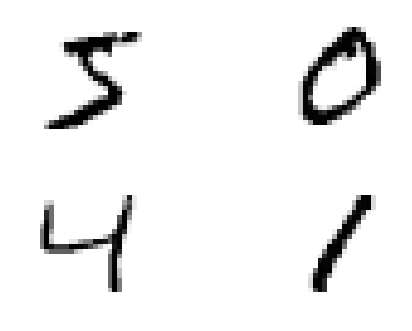

In [8]:
import matplotlib.pyplot as plt

def plot_grid(arr):
  f, axarr = plt.subplots(2,2)
  axarr[0,0].imshow(arr[0])
  axarr[0,1].imshow(arr[1])
  axarr[1,0].imshow(arr[2])
  axarr[1,1].imshow(arr[3])
  
  axarr[0,0].axis('off')
  axarr[0,1].axis('off')
  axarr[1,0].axis('off')
  axarr[1,1].axis('off')

plot_grid(x_train)

In [9]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train images')
print(x_test.shape[0], 'test images')

x_train shape: (60000, 28, 28, 1)
60000 train images
10000 test images


### 4. One hot encoding of output classes

In [0]:
# convert class vectors to one hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### 5. Our first Model 😁

#### 5.1 Architecture

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(momentum=0.9, nesterov=True),
              metrics=['accuracy'])

#### 5.2 Training (≖ ‿ ≖)

In [6]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.5004 - acc: 0.8416 - val_loss: 0.1263 - val_acc: 0.9637
Epoch 2/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.1808 - acc: 0.9458 - val_loss: 0.0747 - val_acc: 0.9768
Epoch 3/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.1266 - acc: 0.9616 - val_loss: 0.0571 - val_acc: 0.9820
Epoch 4/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.1052 - acc: 0.9681 - val_loss: 0.0501 - val_acc: 0.9847
Epoch 5/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.0881 - acc: 0.9730 - val_loss: 0.0461 - val_acc: 0.9851
Epoch 6/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0793 - acc: 0.9762 - val_loss: 0.0413 - val_acc: 0.9865
Epoch 7/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0712 - acc: 0.9789 - val_loss: 0.0388 - 

#### 5.3 Evaluation ᕦ⊙෴⊙ᕤ

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.034466968409749096
Test accuracy: 0.988


### 6. Let's go Deeper! ᕕ( ᐛ )ᕗ

![Go Deeper](https://cdn-images-1.medium.com/max/1600/1*RuDCBpDFK4fuBo6W5OFsEw.jpeg)

#### 6.1 Architecture

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(momentum=0.9, nesterov=True),
              metrics=['accuracy'])

#### 6.2 Training

In [9]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.8186 - acc: 0.7277 - val_loss: 0.1234 - val_acc: 0.9634
Epoch 2/12
60000/60000 [==============================] - 10s 173us/step - loss: 0.1952 - acc: 0.9457 - val_loss: 0.0789 - val_acc: 0.9767
Epoch 3/12
60000/60000 [==============================] - 10s 173us/step - loss: 0.1336 - acc: 0.9648 - val_loss: 0.0605 - val_acc: 0.9827
Epoch 4/12
60000/60000 [==============================] - 10s 173us/step - loss: 0.1093 - acc: 0.9711 - val_loss: 0.0537 - val_acc: 0.9845
Epoch 5/12
60000/60000 [==============================] - 10s 173us/step - loss: 0.0907 - acc: 0.9764 - val_loss: 0.0485 - val_acc: 0.9859
Epoch 6/12
60000/60000 [==============================] - 10s 173us/step - loss: 0.0824 - acc: 0.9779 - val_loss: 0.0476 - val_acc: 0.9872
Epoch 7/12
60000/60000 [==============================] - 10s 174us/step - loss: 0.0708 - acc: 0.9819 - val_loss: 0.

#### 6.3 Evaluation

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03849187142269034
Test accuracy: 0.9917


## CIFAR10

### 1. Importing dependencies and setting seeds

In [1]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
GENERATOR_SEED = 0

Using TensorFlow backend.


### 2. Declaring some constants

In [0]:
batch_size = 32
num_classes = 10
epochs = 25

# input image dimensions
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

### 3. Loading and making our dataset usable

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

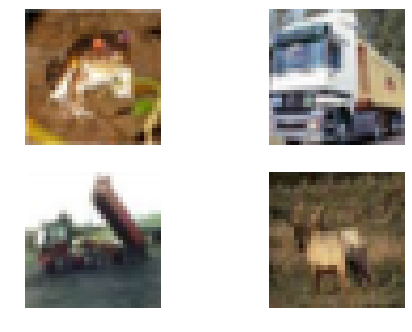

In [4]:
import matplotlib.pyplot as plt

def plot_grid(arr):
  f, axarr = plt.subplots(2,2)
  axarr[0,0].imshow(arr[0])
  axarr[0,1].imshow(arr[1])
  axarr[1,0].imshow(arr[2])
  axarr[1,1].imshow(arr[3])
  
  axarr[0,0].axis('off')
  axarr[0,1].axis('off')
  axarr[1,0].axis('off')
  axarr[1,1].axis('off')

plot_grid(x_train)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### 4. One hot encoding of output classes

In [0]:
# convert class vectors to one hot encodings
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### 5. Our Star Model 😁

#### 5.1 Architecture

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(momentum=0.9, nesterov=True),
              metrics=['accuracy'])

#### 5.2 Training (≖ ‿ ≖)

In [30]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 26s 511us/step - loss: 1.8910 - acc: 0.2825 - val_loss: 1.4262 - val_acc: 0.4684
Epoch 2/25
50000/50000 [==============================] - 24s 473us/step - loss: 1.4558 - acc: 0.4731 - val_loss: 1.2817 - val_acc: 0.5373
Epoch 3/25
50000/50000 [==============================] - 23s 463us/step - loss: 1.2397 - acc: 0.5650 - val_loss: 1.0588 - val_acc: 0.6263
Epoch 4/25
50000/50000 [==============================] - 23s 462us/step - loss: 1.0986 - acc: 0.6201 - val_loss: 1.0068 - val_acc: 0.6468
Epoch 5/25
50000/50000 [==============================] - 23s 454us/step - loss: 0.9926 - acc: 0.6606 - val_loss: 0.8894 - val_acc: 0.6952
Epoch 6/25
50000/50000 [==============================] - 23s 455us/step - loss: 0.9197 - acc: 0.6891 - val_loss: 0.8712 - val_acc: 0.7033
Epoch 7/25
50000/50000 [==============================] - 23s 457us/step - loss: 0.8605 - acc: 0.7109 - val_loss: 0.

#### 5.3 Evaluation ᕦ⊙෴⊙ᕤ

In [31]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8720045260429382
Test accuracy: 0.7503


### 6. Our Star Model  with Data Augmentation

#### 6.1 Architecture

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(momentum=0.9, nesterov=True),
              metrics=['accuracy'])

#### 6.2 Training (≖ ‿ ≖)

In [34]:
datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        zoom_range=0.1,  # range for random zoom
        horizontal_flip=True,  # randomly flip images
)

# Fit the model on the batches generated by datagen.flow()
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size, seed=GENERATOR_SEED),
                    epochs=epochs,
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_test, y_test))

Epoch 1/25
1562/1562 [==============================] - 41s 26ms/step - loss: 1.9736 - acc: 0.2567 - val_loss: 1.5962 - val_acc: 0.4149
Epoch 2/25
1562/1562 [==============================] - 41s 26ms/step - loss: 1.6023 - acc: 0.4142 - val_loss: 1.3369 - val_acc: 0.5102
Epoch 3/25
1562/1562 [==============================] - 41s 26ms/step - loss: 1.4174 - acc: 0.4954 - val_loss: 1.1458 - val_acc: 0.5770
Epoch 4/25
1562/1562 [==============================] - 41s 26ms/step - loss: 1.2926 - acc: 0.5479 - val_loss: 1.0401 - val_acc: 0.6277
Epoch 5/25
1562/1562 [==============================] - 41s 27ms/step - loss: 1.1948 - acc: 0.5871 - val_loss: 0.9687 - val_acc: 0.6620
Epoch 6/25
1562/1562 [==============================] - 41s 27ms/step - loss: 1.1276 - acc: 0.6128 - val_loss: 0.9314 - val_acc: 0.6765
Epoch 7/25
1562/1562 [==============================] - 41s 26ms/step - loss: 1.0719 - acc: 0.6333 - val_loss: 0.9756 - val_acc: 0.6590
Epoch 8/25
1562/1562 [==========================

#### 6.3 Evaluation ᕦ⊙෴⊙ᕤ

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7150107093334198
Test accuracy: 0.7651


#### Visualizing augmented images

In [0]:
train_datagen = datagen.flow(x_train, y_train, batch_size=batch_size, seed=GENERATOR_SEED)

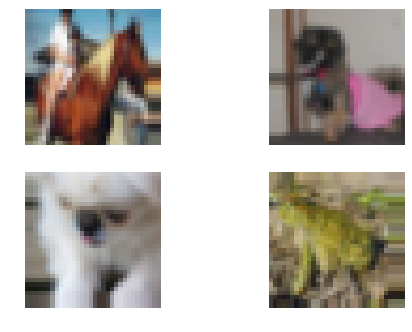

In [9]:
plot_grid(train_datagen.next()[0])